In [ ]:
import torch
import numpy as np

tensor = torch.ones(4, 4)

if torch.accelerator.is_available():
    print("Using the GPU")
    tensor = tensor.to("cuda")

    print(f"Device tensor is stored on: {tensor.device}")
    print(f"First row: {tensor[0]}")
    print(f"Fist columns: {tensor[:, 0]}")
    print(f"Last column: {tensor[..., -1]}")

    tensor[:, 1] = 0
    print(tensor)

    # Arithmetic operations

    y1 = tensor @ tensor.T
    y2 = tensor.matmul(tensor.T)

    y3 = torch.rand_like(y1)
    torch.matmul(tensor, tensor.T, out=y3)

    print(f"{y1=}")
    print(f"{y2=}")
    print(f"{y3=}")

    z1 = tensor * tensor
    z2 = tensor.mul(tensor)

    z3 = torch.rand_like(tensor)
    torch.mul(tensor, tensor, out=z3)

    print(f"{z1=}")
    print(f"{z2=}")
    print(f"{z3=}")

    # Single-element tensors

    agg = tensor.sum()
    agg_item = agg.item()
    print(f"{agg=}")
    print(f"{agg_item=}")
else:
    print("Using the CPU")

Using the GPU
Device tensor is stored on: cuda:0
First row: tensor([1., 1., 1., 1.], device='cuda:0')
Fist columns: tensor([1., 1., 1., 1.], device='cuda:0')
Last column: tensor([1., 1., 1., 1.], device='cuda:0')
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]], device='cuda:0')
y1=tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]], device='cuda:0')
y2=tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]], device='cuda:0')
y3=tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]], device='cuda:0')
z1=tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]], device='cuda:0')
z2=tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]], device='cuda:0')
z3=tensor([[1., 0., 1., 1.],
        [1.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="../dataset/FashionMNIST", train=True, download=True, transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="../dataset/FashionMNIST", train=False, download=True, transform=ToTensor()
)

100.0%
100.0%
100.0%
100.0%


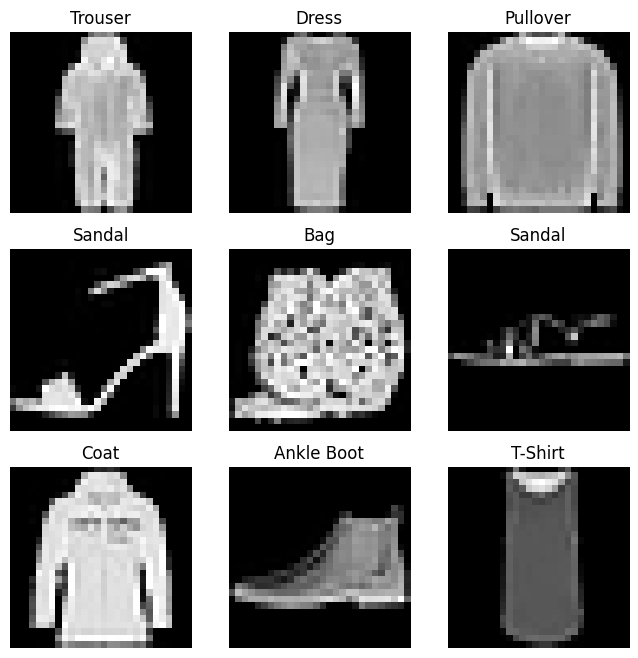

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
import torch

# device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
# print(f"Using {device} device", end="\n\n")

# Neural Netowrk layers

input_image = torch.rand(3,28,28)
print(f"3 28x28 image batch: {input_image.size()}")

flatten = torch.nn.Flatten()
flat_image = flatten(input_image)
print(f"Batch size after flattening: {flat_image.size()}")

layer1 = torch.nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(f"Hidden layer size: {hidden1.size()}")

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = torch.nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

seq_modules = torch.nn.Sequential(
    flatten,
    layer1,
    torch.nn.ReLU(),
    torch.nn.Linear(20, 10)
)

input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)
softmax = torch.nn.Softmax(dim=1)
pred_probab = softmax(logits)

print(f"Prediction probability: {pred_probab}")

3 28x28 image batch: torch.Size([3, 28, 28])
Batch size after flattening: torch.Size([3, 784])
Hidden layer size: torch.Size([3, 20])
Before ReLU: tensor([[-0.0747, -0.2124,  0.1672, -0.0882, -0.4616,  0.3711, -0.3026,  0.2114,
          0.2297,  0.6061,  0.1996, -0.1467, -0.1610, -0.3126,  0.1366,  0.4183,
         -1.0885, -0.4642, -0.1346, -0.0627],
        [-0.1358, -0.0667, -0.0679,  0.4200, -0.5745,  0.2542, -0.4011,  0.3127,
          0.2813,  0.5764,  0.8451, -0.5581, -0.2586,  0.1217,  0.0717,  0.0315,
         -1.2931, -0.2763, -0.6701,  0.0153],
        [-0.2775, -0.0959,  0.2704, -0.2414, -0.6923, -0.1451, -0.2857, -0.0717,
          0.1255,  0.3985,  0.3424, -0.2874, -0.4140, -0.2243,  0.0721,  0.1210,
         -0.7980, -0.4848, -0.3502, -0.1636]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.1672, 0.0000, 0.0000, 0.3711, 0.0000, 0.2114, 0.2297,
         0.6061, 0.1996, 0.0000, 0.0000, 0.0000, 0.1366, 0.4183, 0.0000, 0.0000,
         0.0000, 0.0000],
